In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import community as louvain
import networkx as nx
import itertools
import seaborn as sns
import json

from networkx.algorithms import community

# Community visualizations | ***Mid term presentation***
This notebook contains visualizations of two largest communities / components for the following networks:
1. **Retweet network** 
1. **Replies network** 
1. **Mentions network** 
1. **Interaction network**

### Load example data set 

In [4]:
with open('netw_data/edgelist.json', 'r') as edge_f:
    edge_data = json.load(edge_f)
with open('netw_data/nodelist.json', 'r') as node_f:
    node_data = json.load(node_f)

### Build simple network for testing community detection

In [5]:
G = nx.DiGraph()
G.add_edges_from(edge_data)

In [6]:
len(G.nodes)

116409

In [7]:
len(G.edges)

176065

In [8]:
G = G.to_undirected()

## Retweet network

#### Pick a subset of n users with most retweets and create a sub-graph based on these users

In [617]:
n = 5000
rt_node_subset = sorted(G.degree(weight='retweets'), key=lambda x: x[1], reverse=True)[:n]

In [618]:
rt_node_subset = [i[0] for i in rt_node_subset]  

In [619]:
G_rt = nx.subgraph(G, rt_node_subset)

In [620]:
len(G_rt)

5000

#### Create random bipartition to test coloring

In [621]:
toy_com1 = np.random.choice(G_rt.nodes, size=len(G_rt.nodes)//2, replace=False)
toy_com2 = list(set(G_rt.nodes) - set(toy_com1))

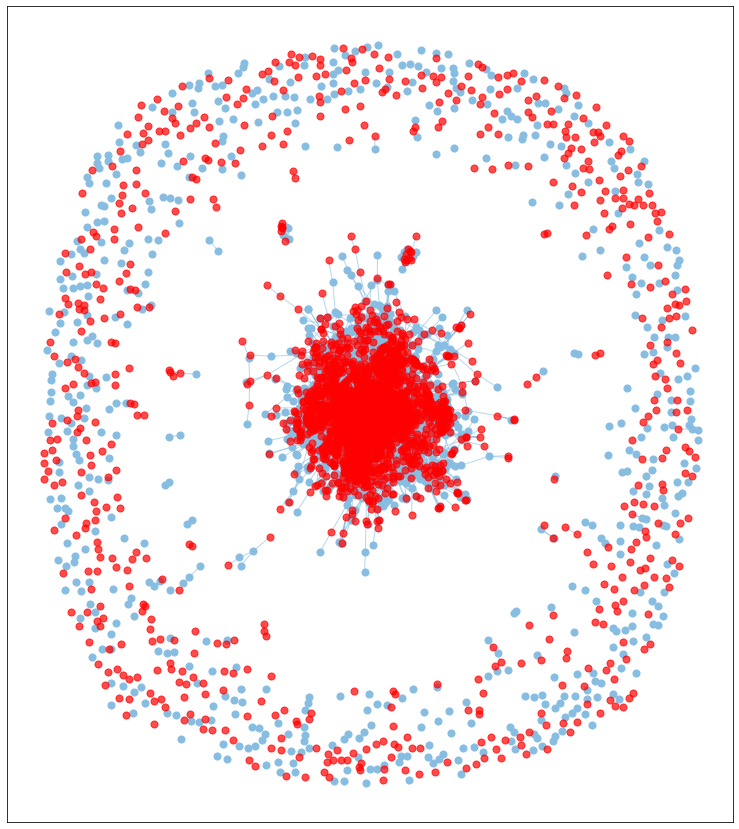

In [622]:
f, ax = plt.subplots(figsize=(13,15))
layout = nx.spring_layout(G_rt, iterations=24)

nx.draw_networkx_edges(G_rt, ax=ax, pos=layout, edgelist=G_rt.edges, alpha=0.6, edge_color ="#88bde2")
nx.draw_networkx_nodes(G_rt, pos=layout, nodelist=toy_com1, node_size=50, node_color='#88bde2')
nx.draw_networkx_nodes(G_rt, pos=layout, nodelist=toy_com2, node_size=50, alpha=0.7, node_color='red')
#nx.draw(G, ax=ax, pos=layout, node_size=14, alpha=0.5, edge_color ="#88bde2", node_color = "b")

## Testing community detection on retweets

In [128]:
#[com1, com2] = community.kernighan_lin_bisection(G_rt.to_undirected())

In [129]:
comms = community.modularity_max.greedy_modularity_communities(G_rt, weight='retweets')

In [130]:
len(comms) # Number of communities

1132

In [132]:
[r_com1, r_com2, r_com3] = sorted(comms, key=len, reverse=True)[:3]

In [133]:
len(r_com1), len(r_com2)

(1139, 785)

In [134]:
# Proportion of users in the two biggest communities
(len(r_com1) + len(r_com2) + len(r_com3)) / np.sum([len(com) for com in comms])

0.468

#### Visualizing 2 biggest communities

In [35]:
subg_nodes = list(set(r_com1).union(set(r_com2)))

In [36]:
G_rt = nx.subgraph(G_rt, subg_nodes)

In [37]:
len(G_rt)

1924

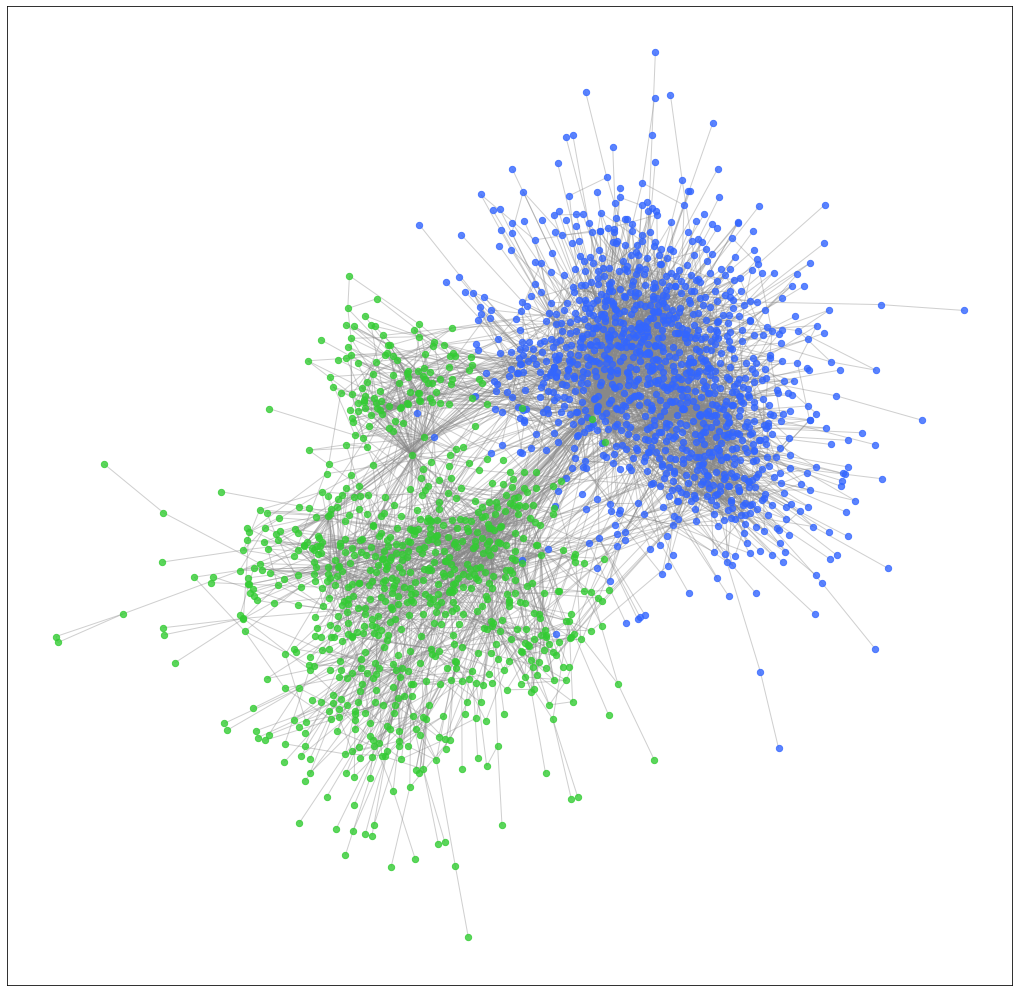

In [44]:
f, ax = plt.subplots(figsize=(18,18))
layout = nx.spring_layout(G_rt, iterations=55)

nx.draw_networkx_edges(G_rt, ax=ax, pos=layout, edgelist=G_rt.edges, alpha=0.4, edge_color ="#888888")
nx.draw_networkx_nodes(G_rt, pos=layout, nodelist=r_com1, node_size=40, alpha=0.8, node_color='#3366ff')
nx.draw_networkx_nodes(G_rt, pos=layout, nodelist=r_com2, node_size=40, alpha=0.8, node_color='#33cc33')
#nx.draw(G, ax=ax, pos=layout, node_size=14, alpha=0.5, edge_color ="#88bde2", node_color = "b")

## Replies network

#### Pick n users with most retweets and create a sub-graph based on these users

In [48]:
n = 5000
rp_node_subset = sorted(G.degree(weight='replies'), key=lambda x: x[1], reverse=True)[:n]

In [49]:
rp_node_subset = [i[0] for i in rp_node_subset]  

In [50]:
G_rp = nx.subgraph(G, rp_node_subset)

In [52]:
len(G_rp)

5000

#### Create random bipartition to test coloring

In [53]:
toy_com1 = np.random.choice(G_rp.nodes, size=len(G_rp.nodes)//2, replace=False)
toy_com2 = list(set(G_rp.nodes) - set(toy_com1))

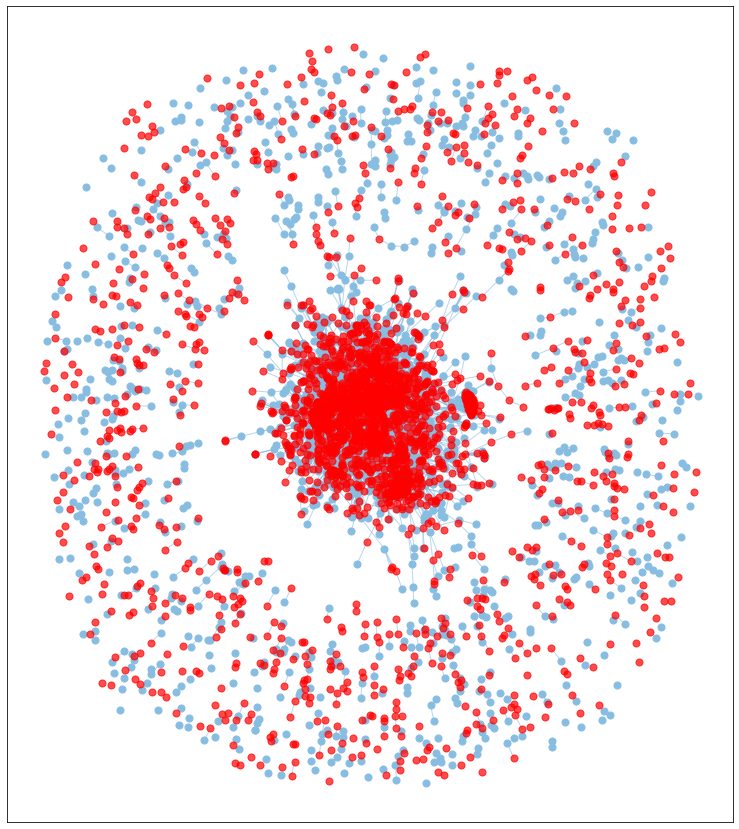

In [54]:
f, ax = plt.subplots(figsize=(13,15))
layout = nx.spring_layout(G_rp, iterations=24)

nx.draw_networkx_edges(G_rp, ax=ax, pos=layout, edgelist=G_rp.edges, alpha=0.6, edge_color ="#88bde2")
nx.draw_networkx_nodes(G_rp, pos=layout, nodelist=toy_com1, node_size=50, node_color='#88bde2')
nx.draw_networkx_nodes(G_rp, pos=layout, nodelist=toy_com2, node_size=50, alpha=0.7, node_color='red')
#nx.draw(G, ax=ax, pos=layout, node_size=14, alpha=0.5, edge_color ="#88bde2", node_color = "b")

## Testing community detection on replies

In [57]:
#[com1, com2] = community.kernighan_lin_bisection(G_rt.to_undirected())

In [58]:
comms = community.modularity_max.greedy_modularity_communities(G_rp, weight='replies')

In [59]:
len(comms) # Number of communities

1175

In [60]:
[r_com1, r_com2, r_com3] = sorted(comms, key=len, reverse=True)[:3]

In [61]:
# Proportion of users in the two biggest communities
(len(r_com1) + len(r_com2) + len(r_com3)) / np.sum([len(com) for com in comms])

0.5322

#### Visualizing 2 biggest communities

In [62]:
subg_nodes = list(set(r_com1).union(set(r_com2)))

In [63]:
G_rp = nx.subgraph(G_rp, subg_nodes)

In [64]:
len(G_rp)

2539

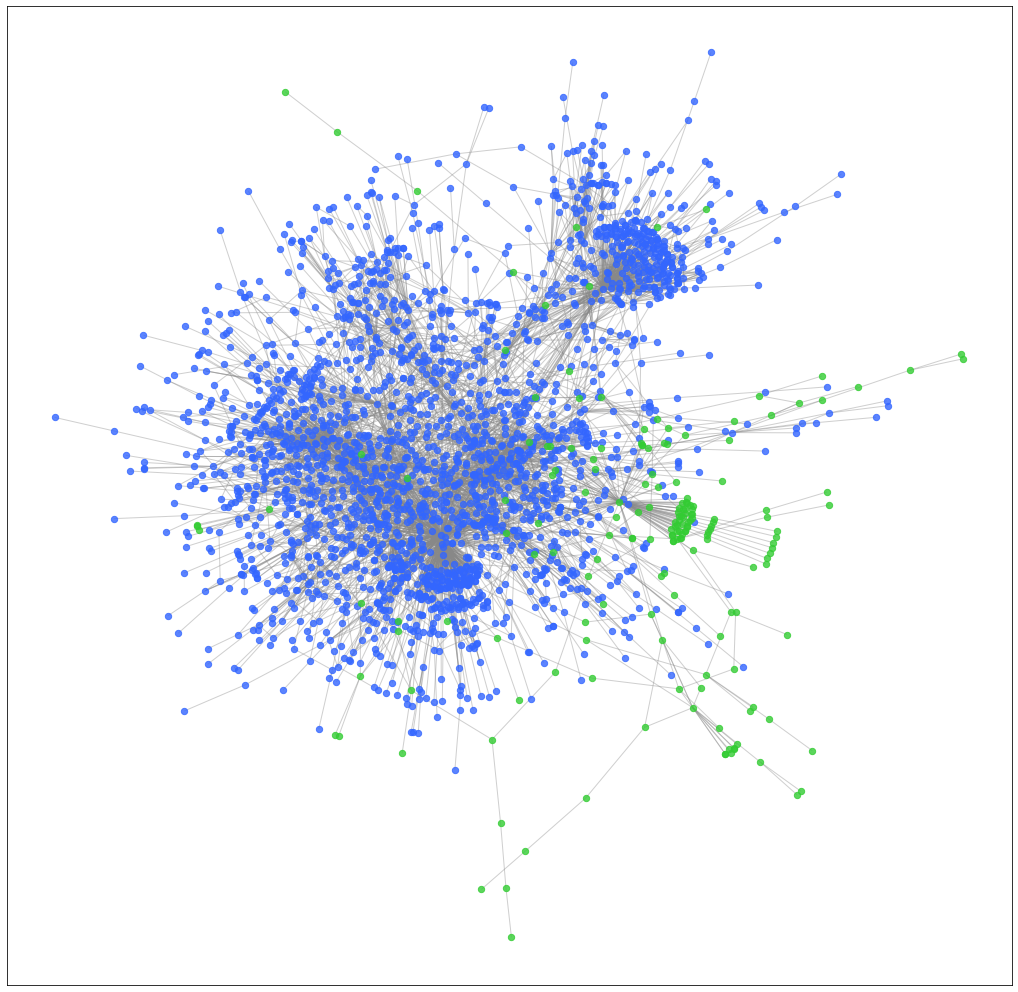

In [65]:
f, ax = plt.subplots(figsize=(18,18))
layout = nx.spring_layout(G_rp, iterations=55)

nx.draw_networkx_edges(G_rp, ax=ax, pos=layout, edgelist=G_rp.edges, alpha=0.4, edge_color ="#888888")
nx.draw_networkx_nodes(G_rp, pos=layout, nodelist=r_com1, node_size=40, alpha=0.8, node_color='#3366ff')
nx.draw_networkx_nodes(G_rp, pos=layout, nodelist=r_com2, node_size=40, alpha=0.8, node_color='#33cc33')
#nx.draw(G, ax=ax, pos=layout, node_size=14, alpha=0.5, edge_color ="#88bde2", node_color = "b")

## Mentions network

#### Pick n users with most retweets and create a sub-graph based on these users

In [74]:
n = 5000
m_node_subset = sorted(G.degree(weight='orig_mentions'), key=lambda x: x[1], reverse=True)[:n]

In [75]:
m_node_subset = [i[0] for i in m_node_subset]  

In [76]:
G_m = nx.subgraph(G, m_node_subset)

In [77]:
len(G_m)

5000

#### Create random bipartition to test coloring

In [80]:
toy_com1 = np.random.choice(G_m.nodes, size=len(G_m.nodes)//2, replace=False)
toy_com2 = list(set(G_m.nodes) - set(toy_com1))

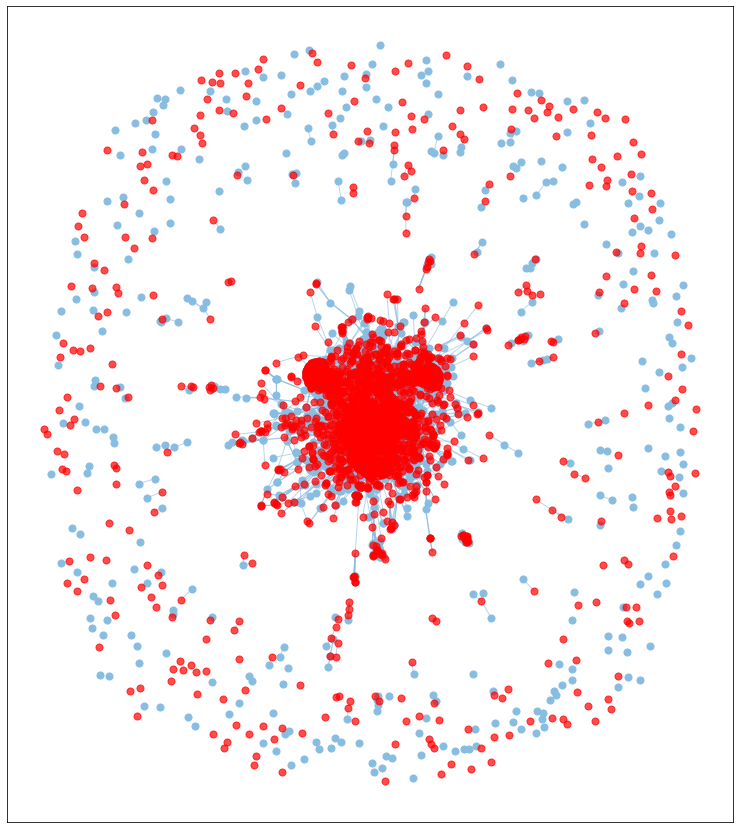

In [81]:
f, ax = plt.subplots(figsize=(13,15))
layout = nx.spring_layout(G_m, iterations=24)

nx.draw_networkx_edges(G_m, ax=ax, pos=layout, edgelist=G_m.edges, alpha=0.6, edge_color ="#88bde2")
nx.draw_networkx_nodes(G_m, pos=layout, nodelist=toy_com1, node_size=50, node_color='#88bde2')
nx.draw_networkx_nodes(G_m, pos=layout, nodelist=toy_com2, node_size=50, alpha=0.7, node_color='red')
#nx.draw(G, ax=ax, pos=layout, node_size=14, alpha=0.5, edge_color ="#88bde2", node_color = "b")

## Testing community detection on mentions

In [82]:
#[com1, com2] = community.kernighan_lin_bisection(G_rt.to_undirected())

In [83]:
comms = community.modularity_max.greedy_modularity_communities(G_m, weight='orig_mentions')

In [84]:
len(comms) # Number of communities

645

In [85]:
[r_com1, r_com2, r_com3] = sorted(comms, key=len, reverse=True)[:3]

In [86]:
# Proportion of users in the two biggest communities
(len(r_com1) + len(r_com2) + len(r_com3)) / np.sum([len(com) for com in comms])

0.4616

#### Visualizing 2 biggest communities

In [87]:
subg_nodes = list(set(r_com1).union(set(r_com2)))

In [88]:
G_m = nx.subgraph(G_m, subg_nodes)

In [90]:
len(G_m)

1746

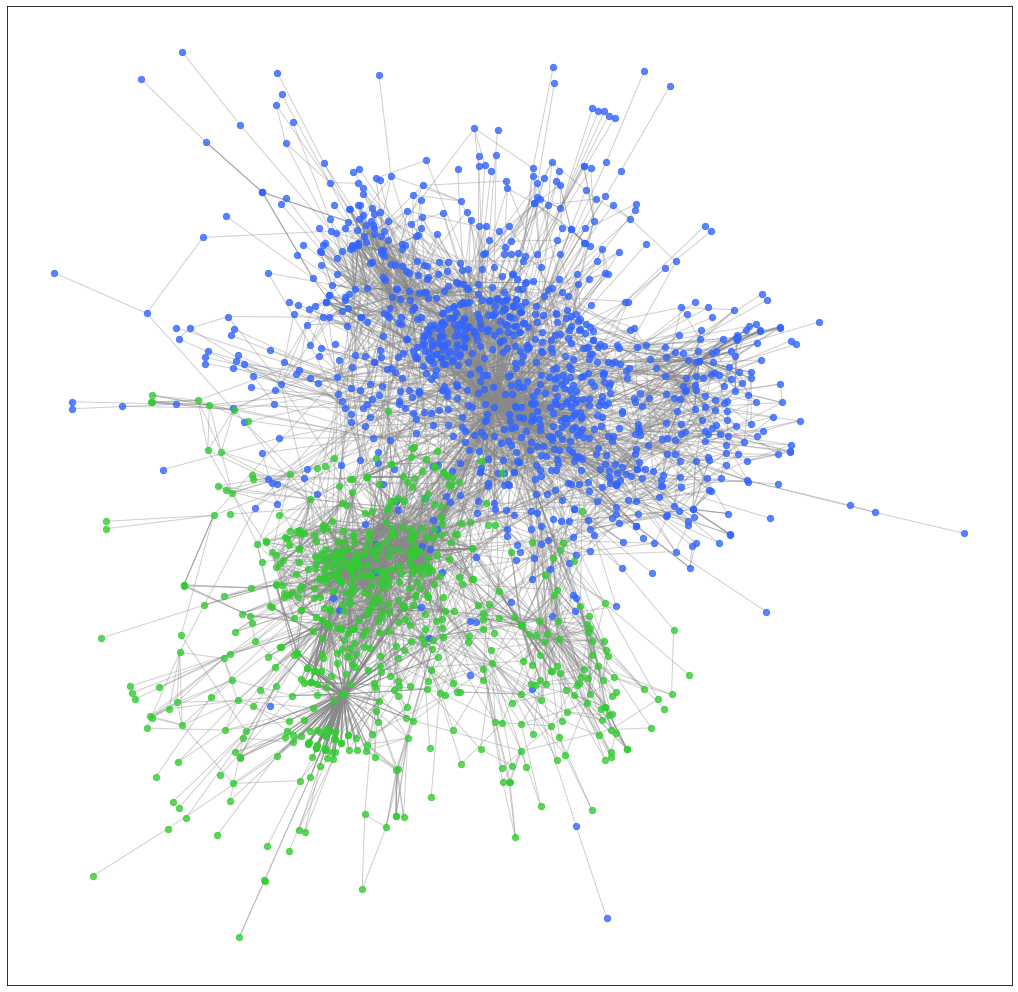

In [91]:
f, ax = plt.subplots(figsize=(18,18))
layout = nx.spring_layout(G_m, iterations=55)

nx.draw_networkx_edges(G_m, ax=ax, pos=layout, edgelist=G_m.edges, alpha=0.4, edge_color ="#888888")
nx.draw_networkx_nodes(G_m, pos=layout, nodelist=r_com1, node_size=40, alpha=0.8, node_color='#3366ff')
nx.draw_networkx_nodes(G_m, pos=layout, nodelist=r_com2, node_size=40, alpha=0.8, node_color='#33cc33')
#nx.draw(G, ax=ax, pos=layout, node_size=14, alpha=0.5, edge_color ="#88bde2", node_color = "b")

## Full interaction network

In [60]:
## Transform into the complete interaction network (summing up all attributes)

In [61]:
sumf = lambda x: (x[0],x[1],{'interactions': (x[2]['replies'] + x[2]['retweets'] + x[2]['orig_mentions'])})
edges_i = list(map(sumf, G.edges(data=True)))

In [62]:
G_i = nx.DiGraph()
G_i.add_edges_from(edges_i)
G_i = G_i.to_undirected()

#### Pick n users with most interactions and create a sub-graph based on these users

In [63]:
n = 5000
i_node_subset = sorted(G_i.degree(weight='interactions'), key=lambda x: x[1], reverse=True)[:n]

In [64]:
i_node_subset = [i[0] for i in i_node_subset]  

In [65]:
G_i = nx.subgraph(G_i, i_node_subset)

In [66]:
len(G_i)

5000

#### Create random bipartition to test coloring

In [67]:
toy_com1 = np.random.choice(G_i.nodes, size=len(G_i.nodes)//2, replace=False)
toy_com2 = list(set(G_i.nodes) - set(toy_com1))

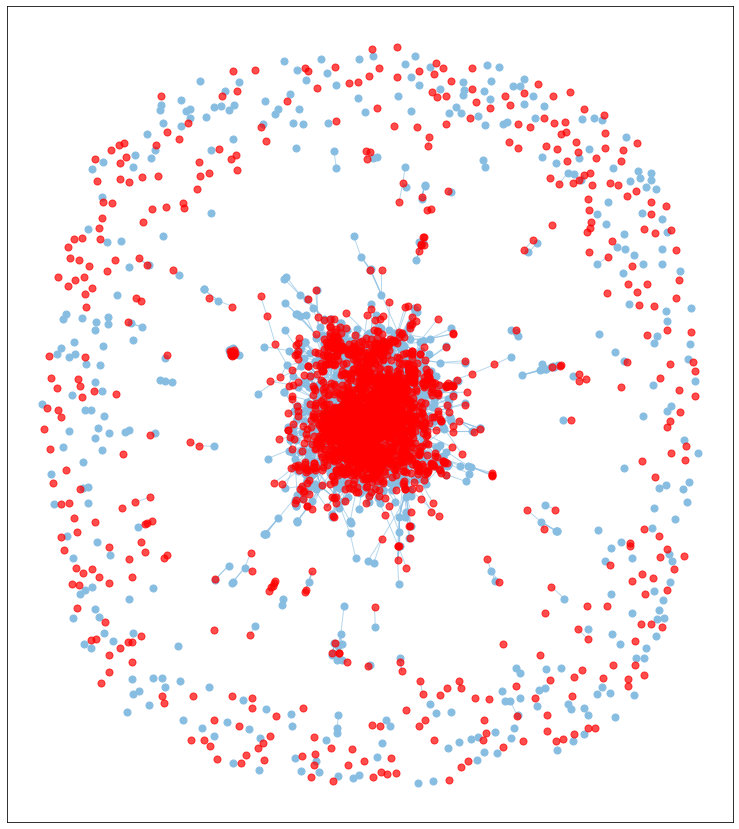

In [17]:
f, ax = plt.subplots(figsize=(13,15))
layout = nx.spring_layout(G_i, iterations=24)

nx.draw_networkx_edges(G_i, ax=ax, pos=layout, edgelist=G_i.edges, alpha=0.6, edge_color ="#88bde2")
nx.draw_networkx_nodes(G_i, pos=layout, nodelist=toy_com1, node_size=50, node_color='#88bde2')
nx.draw_networkx_nodes(G_i, pos=layout, nodelist=toy_com2, node_size=50, alpha=0.7, node_color='red')
#nx.draw(G, ax=ax, pos=layout, node_size=14, alpha=0.5, edge_color ="#88bde2", node_color = "b")

## Testing community detection on interactions

In [68]:
#[com1, com2] = community.kernighan_lin_bisection(G_rt.to_undirected())

In [69]:
comms = community.modularity_max.greedy_modularity_communities(G_i, weight='interactions')

In [70]:
len(comms) # Number of communities

756

In [71]:
[r_com1, r_com2, r_com3] = sorted(comms, key=len, reverse=True)[:3]

In [72]:
# Proportion of users in the two biggest communities
(len(r_com1) + len(r_com2) + len(r_com3)) / np.sum([len(com) for com in comms])

0.3104

#### Visualizing 2 biggest communities

In [73]:
subg_nodes = list(set(r_com1).union(set(r_com2)))

In [74]:
G_i = nx.subgraph(G_i, subg_nodes)

In [75]:
len(G_i)

1073

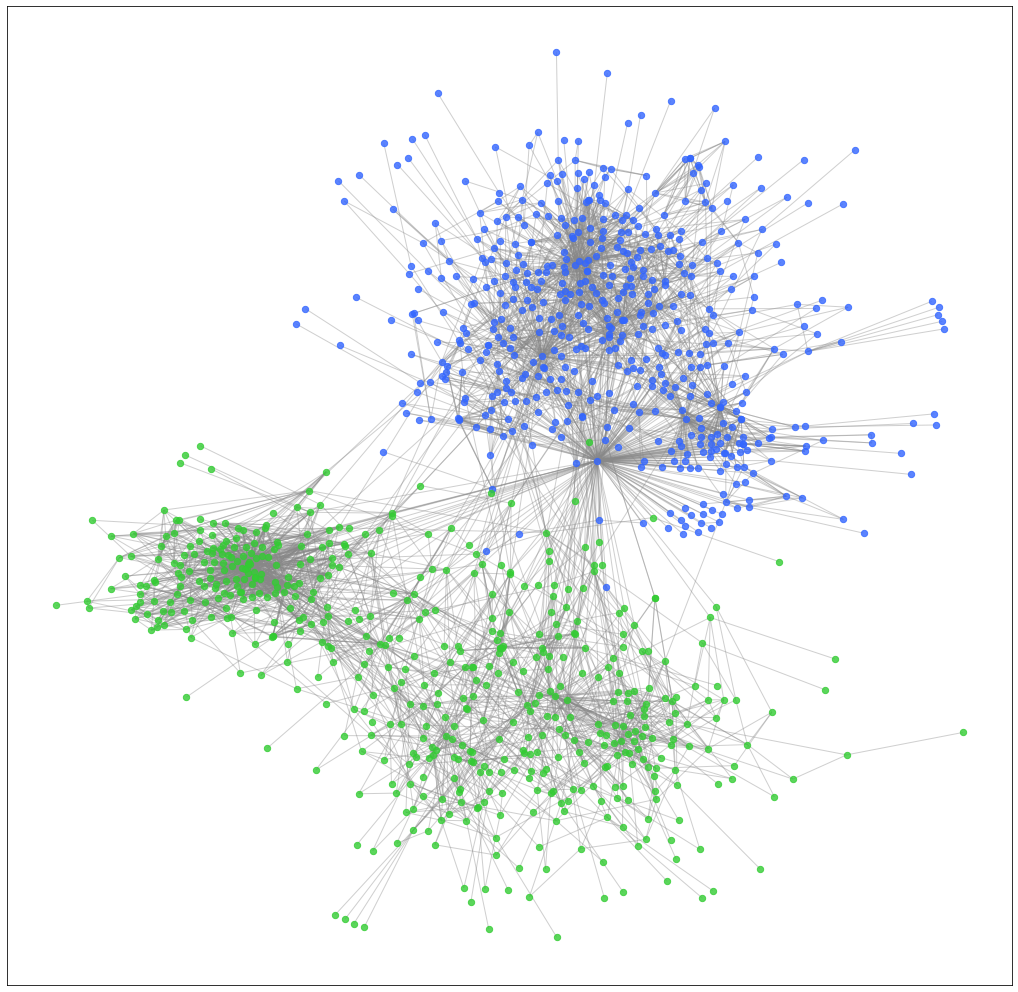

In [76]:
f, ax = plt.subplots(figsize=(18,18))
layout = nx.spring_layout(G_i, iterations=55)

nx.draw_networkx_edges(G_i, ax=ax, pos=layout, edgelist=G_i.edges, alpha=0.4, edge_color ="#888888")
nx.draw_networkx_nodes(G_i, pos=layout, nodelist=r_com1, node_size=40, alpha=0.8, node_color='#3366ff')
nx.draw_networkx_nodes(G_i, pos=layout, nodelist=r_com2, node_size=40, alpha=0.8, node_color='#33cc33')
#nx.draw(G, ax=ax, pos=layout, node_size=14, alpha=0.5, edge_color ="#88bde2", node_color = "b")